# AN ANALYSIS OF THE ENGLISH PREMIER LEAGUE'S 2020/2021 SEASON

## By: Urias, Triumph B.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
pwd = os.getcwd()

In [3]:
df = pd.read_csv(pwd + "/DataSet/EPL_20_21.csv")
df.head(5)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
# Make copy to allow for easy reference to original DataFrame

epl_df = df.copy()
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [5]:
# Investigate DataFrame

epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [6]:
print(f"The dataset has a {df.shape} shape. This means that a total of {df.shape[0]} players \
were observed to obtain {df.shape[1]} features each.")

The dataset has a (532, 18) shape. This means that a total of 532 players were observed to obtain 18 features each.


In [7]:
# Get summary statitics for numerical features in the dataset

epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


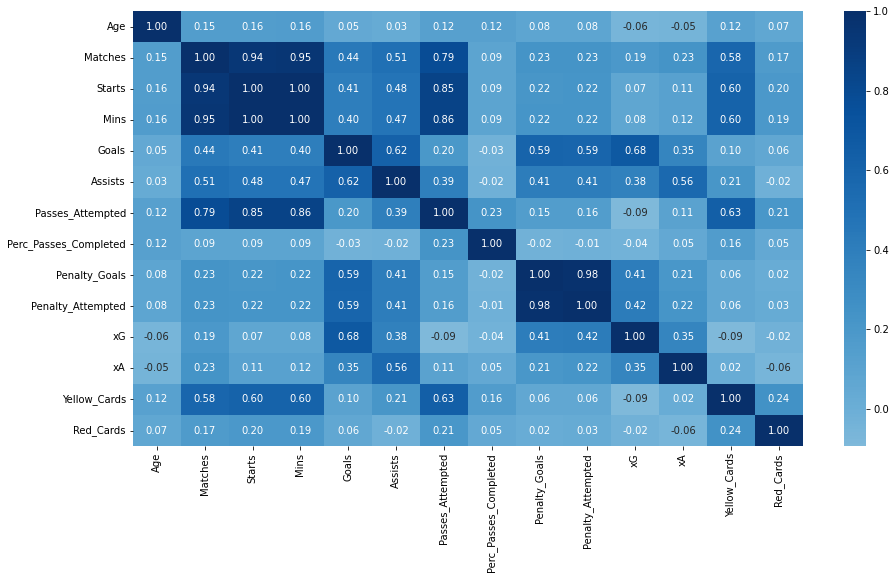

In [8]:
# Check for correllations in the dataset.

plt.figure(figsize = [15,8])
sns.heatmap(epl_df.corr(), cmap = "Blues", annot = True, fmt =".2f", center = 0);

**Insight 1**: Contrary to popular belief, age has rather negligible correlation with the number of starts, number of 
matches played, goals scored or asssists made by players.

**Insight 2**: The dataset investigated supports the school of thought that the older a player gets the few goals are expected from him although age has very little correlation with actual goals scored.

In [9]:
# Create mins_per_match, Goals_per_match and Assists_per_match columns

epl_df["Mins_per_Match"] = (epl_df["Mins"] / epl_df["Matches"]).astype(int)
epl_df["Goals_per_Match"] = (epl_df["Goals"] / epl_df["Matches"]).astype(float).round(2)
epl_df["Assists_per_Match"] = (epl_df["Assists"] / epl_df["Matches"]).astype(float).round(2)


epl_df.head()


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_per_Match,Goals_per_Match,Assists_per_Match
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,...,82.3,1,1,0.21,0.24,2,0,80,0.17,0.14
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,84.6,0,0,0.00,0.00,2,0,88,0.00,0.00
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,77.2,0,0,0.41,0.21,2,0,74,0.17,0.23
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,78.6,0,0,0.10,0.11,3,0,84,0.11,0.19
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,85.0,0,0,0.06,0.12,3,0,74,0.03,0.06


In [10]:
# Calculate total number of goals scored during the entire season

Total_Goals = epl_df["Goals"].sum()

print( f"A total of {Total_Goals} goals were scored during the 2020/2021 season of the EPL.")

A total of 986 goals were scored during the 2020/2021 season of the EPL.


In [11]:
# Calculate total number of penalty goals scored in the entire season.

Total_Penalty_Goals = epl_df["Penalty_Goals"].sum()

print(f"A total of {Total_Penalty_Goals} goals were scored from the penalty spot.")

A total of 102 goals were scored from the penalty spot.


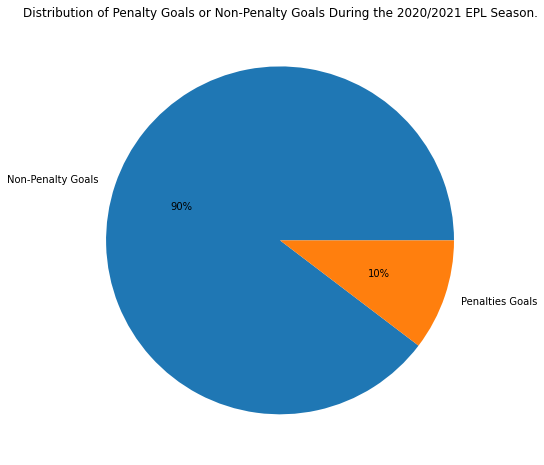

In [12]:
# Distribution of penalty goals or non-penalty goals

Non_Penalty_Goals = Total_Goals - Total_Penalty_Goals
data = [Non_Penalty_Goals, Total_Penalty_Goals]
labels = ["Non-Penalty Goals", "Penalties Goals"]

colors = sns.color_palette()

plt.figure(figsize = [15, 8])
plt.pie(data, labels = labels, colors = colors, autopct = "%.0f%%")
plt.title("Distribution of Penalty Goals or Non-Penalty Goals During the 2020/2021 EPL Season.")
plt.show()

In [13]:
# Calculate total penalty attempts

Total_Penalties_Attempted = epl_df["Penalty_Attempted"].sum()
print(f"A total of {Total_Penalties_Attempted} penalties were attempted.")


A total of 125 penalties were attempted.


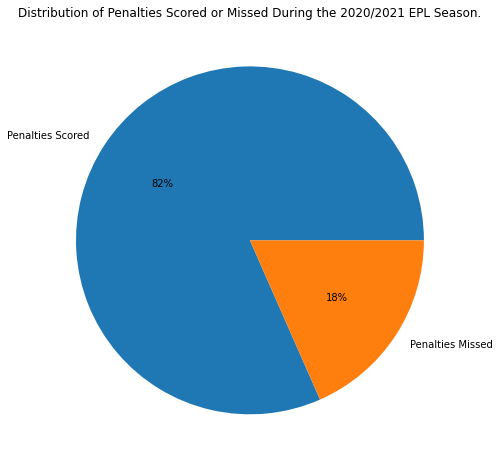

In [14]:
# Distribution of penalties scored or missed


Total_Penalties_Missed = Total_Penalties_Attempted - Total_Penalty_Goals

data = [Total_Penalty_Goals, Total_Penalties_Missed]
labels = ["Penalties Scored", "Penalties Missed"]

colors = sns.color_palette()

plt.figure(figsize = [15, 8])
plt.pie(data, labels = labels, colors = colors, autopct = "%.0f%%")
plt.title("Distribution of Penalties Scored or Missed During the 2020/2021 EPL Season.")
plt.show()

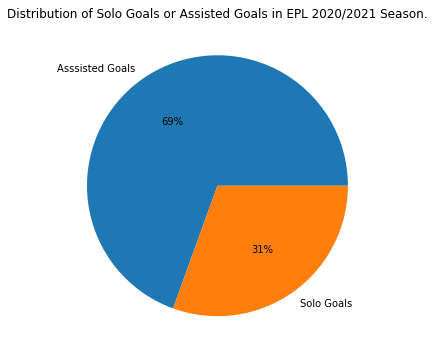

In [15]:
# Asisted goals vs. Solo goals

plt.figure(figsize = (15, 6))

assisted_goals = epl_df["Assists"].sum()
solo_goals = Total_Goals - assisted_goals

data = [assisted_goals, solo_goals]
labels = ["Asssisted Goals", "Solo Goals"]

plt.pie(x = data, labels = labels, autopct = "%.0f%%");
plt.title("Distribution of Solo Goals or Assisted Goals in EPL 2020/2021 Season.");

**Insight 3**: Almost 70% of all the goals scored in the 2020/2021 EPL season were assisted. This is a very high percentage and shows that football is truly a team sport and "1 man doesn't make a team".


In [16]:
# Total number of unique positions played during the season

epl_df["Position"].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [17]:
# Calculate total number of players who could play in the "FW" position

Forward_Players = epl_df["Position"].str.contains("FW").sum()

print(f"\"On paper\", there were a total of {Forward_Players} players who could play in the forward position.")

"On paper", there were a total of 176 players who could play in the forward position.


In [18]:
# Calculate the representation of various countries in the EPL in the 2020/2021 season

representation = np.size((epl_df["Nationality"].unique()))

print(f"There were a total of {representation} nations represeted in the EPL during the \
2020/2021 season.")


There were a total of 59 nations represeted in the EPL during the 2020/2021 season.


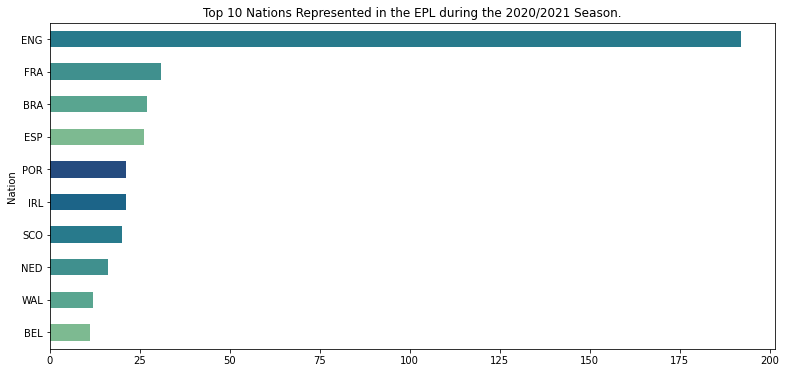

In [19]:
# Total countries represented

plt.figure(figsize = [13,6])

nationality = epl_df.groupby("Nationality").size().sort_values(ascending = True)

nationality.tail(10).plot(
    kind = "barh",
    xlabel = "Nation",
    ylabel = "Player population",
    title = "Top 10 Nations Represented in the EPL during the 2020/2021 Season.",
    color = sns.color_palette("crest")
);

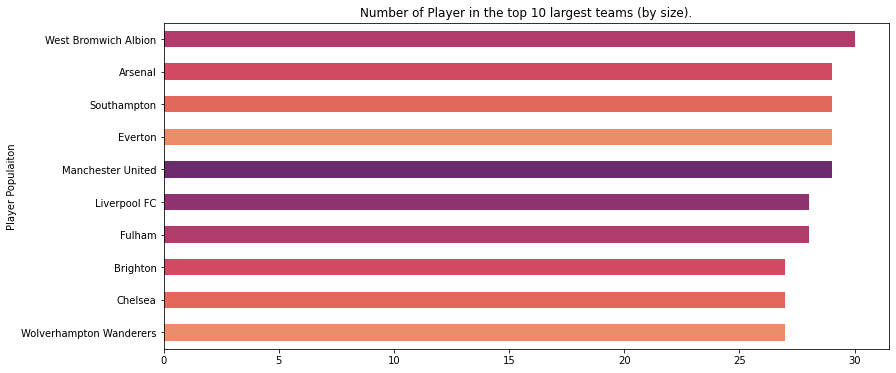

In [20]:
# Club player size

plt.figure(figsize = [13,6])

club_size = epl_df.groupby("Club").size().sort_values(ascending = True)

club_size.tail(10).plot(
    kind = "barh",
    xlabel = "Player Populaiton",
    ylabel = "Club",
    title = "Number of Player in the top 10 largest teams (by size).",
    color = sns.color_palette("flare")
);


**Insight 4**: This comes as a surprise to me. The fact that West Bromwich Albion has the largest squad. One would have expected some of the much richer clubs to have a bigger squad size.

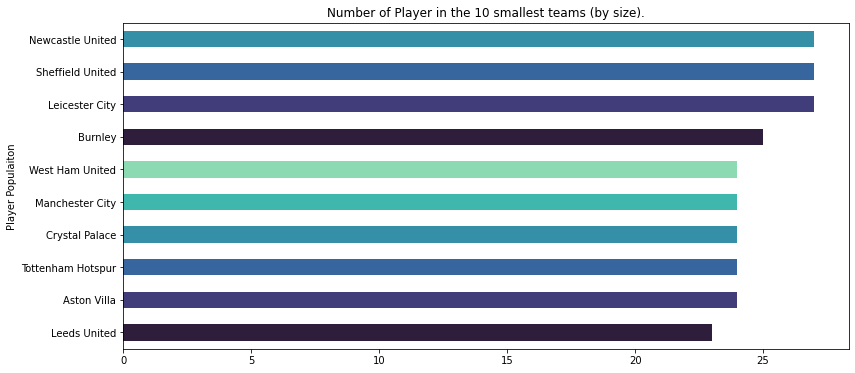

In [21]:
# Club size 

plt.figure(figsize = [13,6])

club_size = epl_df.groupby("Club").size().sort_values(ascending = True)

club_size.head(10).plot(
    kind = "barh",
    xlabel = "Player Populaiton",
    ylabel = "Club",
    title = "Number of Player in the 10 smallest teams (by size).",
    color = sns.color_palette("mako")
);

**Insight 5**: Manchester City in the bottom 10 in terms of squad size? This is very surprising.

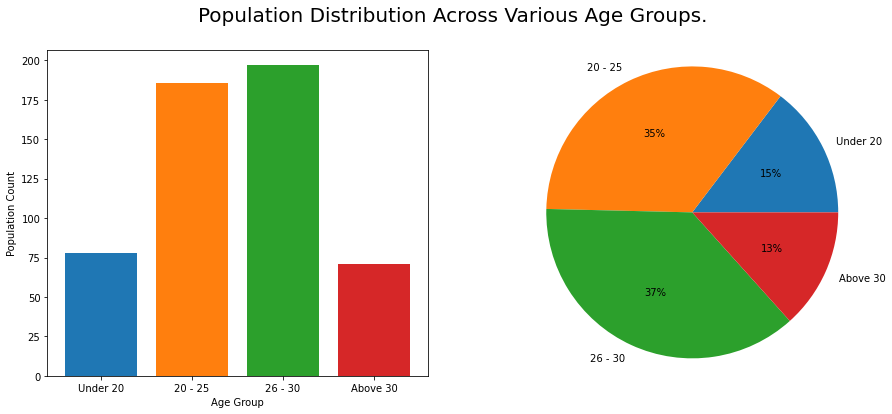

In [22]:
# Player population by age group

Under20 = (epl_df[epl_df["Age"] <= 20])
Between20_25 = (epl_df[(epl_df["Age"] > 20) & (epl_df["Age"] <= 25)])
Between25_30 =(epl_df[(epl_df["Age"] > 25) & (epl_df["Age"] <= 30)])
Above30 = (epl_df[epl_df["Age"] > 30])

x = np.array([Under20["Name"].count(), Between20_25["Name"].count(), 
    Between25_30["Name"].count(), Above30["Name"].count()])

labels = ["Under 20", "20 - 25", "26 - 30", "Above 30"]


color = sns.color_palette("tab10")
plt.figure(figsize = [15,6])

plt.subplot(1,2,1)
plt.bar(
    x = labels,
    height = x,
    color = color
)
plt.xlabel("Age Group")
plt.ylabel("Population Count");
plt.suptitle("Population Distribution Across Various Age Groups.", fontsize = 20)

plt.subplot(1,2,2)
plt.pie(x, labels = labels, autopct = "%.0f%%");
plt.axis("square");

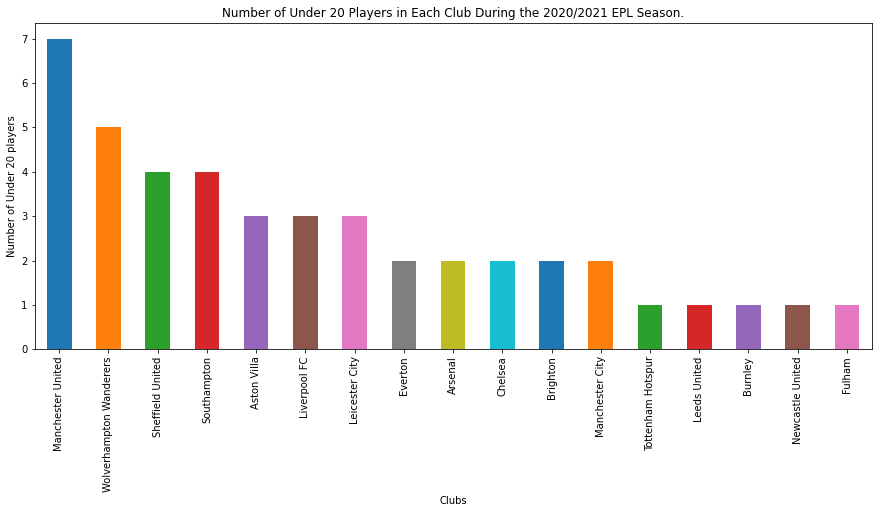

In [23]:
# Under 20 players in each club

plt.figure(figsize = [15,6])
players_under_20 = epl_df[epl_df["Age"] < 20]

players_under_20["Club"].value_counts().plot(
    kind = "bar",
    xlabel = "Clubs",
    ylabel  = "Number of Under 20 players",
    title = "Number of Under 20 Players in Each Club During the 2020/2021 EPL Season.",
    color = sns.color_palette()
);

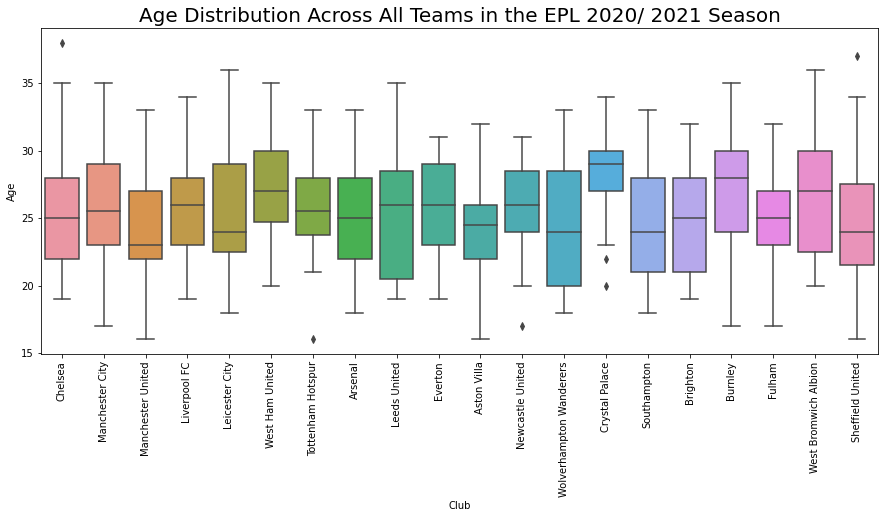

In [24]:
# Average age of players in each club

plt.figure(figsize = [15,6])

sns.boxplot(data = epl_df, x = "Club", y = "Age")
plt.xticks(rotation = 90)
plt.title("Age Distribution Across All Teams in the EPL 2020/ 2021 Season", fontsize =20);

In [25]:
oldest_player = epl_df[epl_df["Age"] > 35]
oldest_player

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_per_Match,Goals_per_Match,Assists_per_Match
22,Willy Caballero,Chelsea,ARG,GK,38,1,1,90,0,0,...,92.3,0,0,0.00,0.00,0,0,90,0.0,0.0
133,Wes Morgan,Leicester City,JAM,DF,36,3,0,18,0,0,...,100.0,0,0,0.00,0.00,0,0,6,0.0,0.0
493,Branislav Ivanovi?,West Bromwich Albion,SRB,DF,36,13,8,767,0,0,...,85.2,0,0,0.06,0.01,2,0,59,0.0,0.0
525,Phil Jagielka,Sheffield United,ENG,DF,37,10,6,526,0,0,...,76.3,0,0,0.00,0.00,1,1,52,0.0,0.0


In [26]:
youngest_player = epl_df[epl_df["Age"] < 17] 
youngest_player

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_per_Match,Goals_per_Match,Assists_per_Match
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,...,75.0,0,0,0.00,0.0,0,0,5,0.0,0.0
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,...,-1.0,0,0,0.00,0.0,0,0,1,0.0,0.0
284,Carney Chukwuemeka,Aston Villa,ENG,"FW,MF",16,2,0,20,0,0,...,62.5,0,0,0.29,0.0,0,0,10,0.0,0.0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,...,100.0,0,0,1.16,0.0,0,0,11,0.0,0.0


**Insight 6**: Manchester United had the highest number of Under 20 players and also the youngest team. On the other hand, Crystal Palace didn't have up to players under the age of 20 and had the oldest team on average.

**Insight 7**: The Chelsea goalkeeper, Willy Caballero at age 38 was the oldest player in the 2020/2021 EPL season.

**Insight 8**: The younget players that featured in the analysed EPL season were 16 years old.

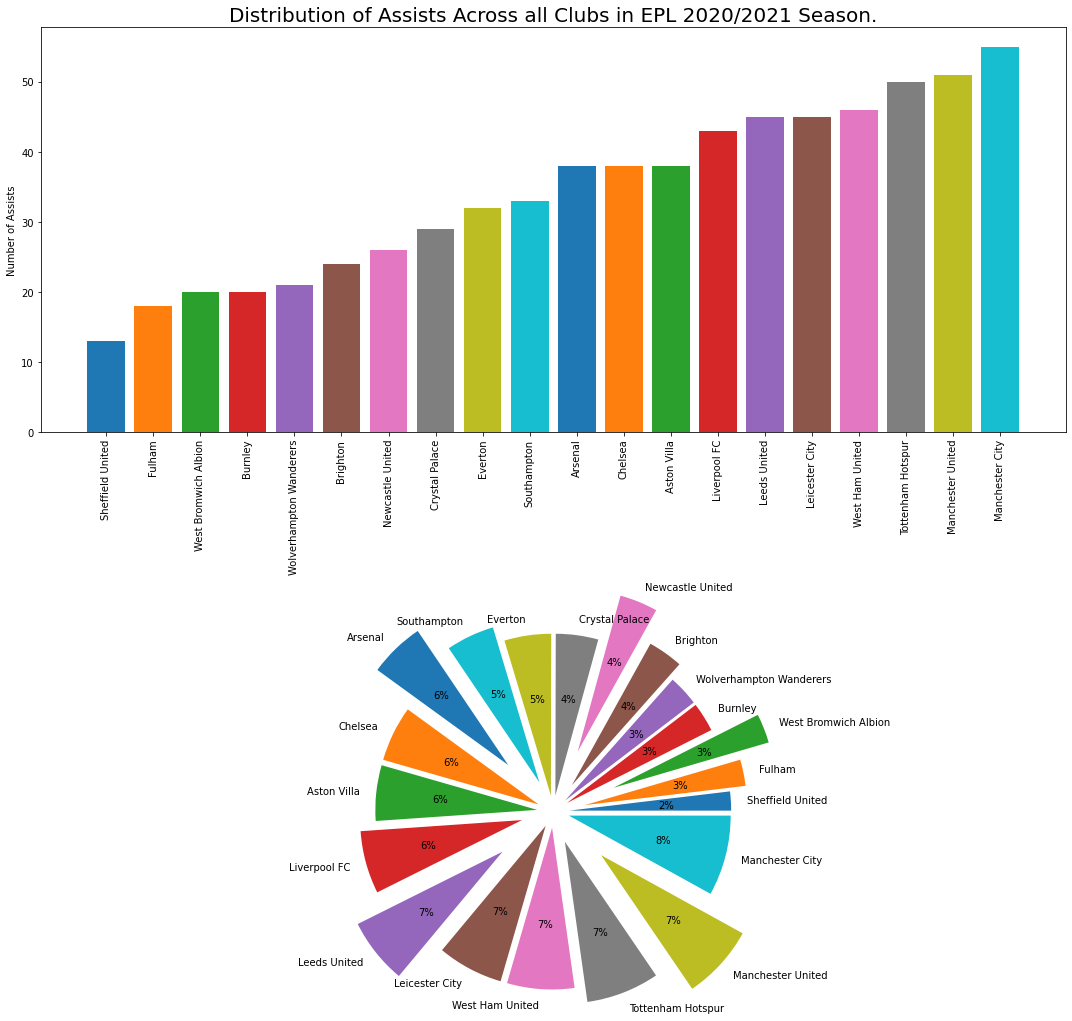

In [27]:
# Total asssits for each club

plt.figure(figsize = [15,14])

assists_by_club = epl_df.groupby("Club")["Assists"].sum().sort_values(ascending = True)

plt.subplot(2,1,1)
plt.bar(
    x = assists_by_club.index,
    height = assists_by_club,
    color = sns.color_palette()
)
plt.ylabel("Number of Assists")
plt.xticks(rotation = 90);

plt.subplot(2,1,2)
explode = np.array([0.1, 0.2, 0.4, 0.1] * 5 )
plt.pie(x = assists_by_club, labels = assists_by_club.index, autopct = "%.0f%%", explode = explode);

plt.tight_layout()
plt.subplot(2,1,1).set_title("Distribution of Assists Across all Clubs in EPL 2020/2021 Season.", fontsize = 20);

In [28]:
# Top 10 "Assisters"

top_10_assists = epl_df[["Name", "Club", "Assists", "Matches"]].nlargest(n = 10, columns = "Assists").reset_index(
    drop = True).set_index(pd.Index(range(1,11)))
top_10_assists

,Name,Club,Assists,Matches
1,Harry Kane,Tottenham Hotspur,14,35
2,Kevin De Bruyne,Manchester City,12,25
3,Bruno Fernandes,Manchester United,12,37
4,Son Heung-min,Tottenham Hotspur,10,37
5,Jack Grealish,Aston Villa,10,26
6,Marcus Rashford,Manchester United,9,37
7,Jamie Vardy,Leicester City,9,34
8,Raphael Dias Belloli,Leeds United,9,30
9,Timo Werner,Chelsea,8,35
10,Aaron Cresswell,West Ham United,8,36


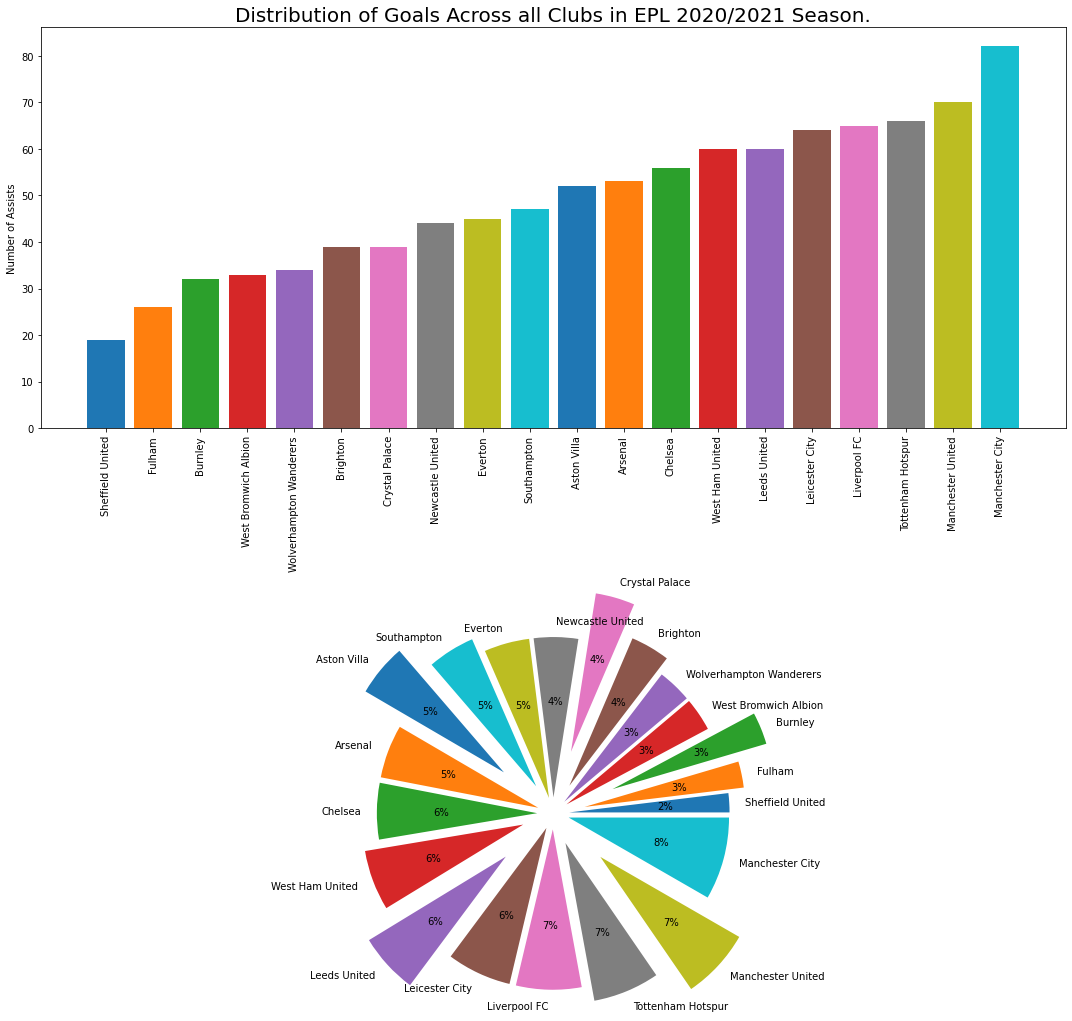

In [29]:
# Total goals for each club

plt.figure(figsize = [15,14])

goals_by_club = epl_df.groupby("Club")["Goals"].sum().sort_values(ascending = True)

plt.subplot(2,1,1)
plt.bar(
    x = goals_by_club.index,
    height = goals_by_club,
    color = sns.color_palette()
)
plt.ylabel("Number of Assists")
plt.xticks(rotation = 90);

plt.subplot(2,1,2)
explode = np.array([0.1, 0.2, 0.4, 0.1] * 5 )
plt.pie(x = goals_by_club, labels = goals_by_club.index, autopct = "%.0f%%", explode = explode);

plt.tight_layout()
plt.subplot(2,1,1).set_title("Distribution of Goals Across all Clubs in EPL 2020/2021 Season.", fontsize = 20);

**Insight 9**: Manchester City having the highest number of assists and the highest number of goals really play football as a unit in the 2020/2021 season.

In [30]:
# Top 10 Goal Scorers

top_10_goal_scorers = epl_df[["Name", "Club", "Goals", "Matches"]].nlargest(n = 10, columns = "Goals").reset_index(
    drop = True).set_index(pd.Index(range(1,11)))
top_10_goal_scorers

,Name,Club,Goals,Matches
1,Harry Kane,Tottenham Hotspur,23,35
2,Mohamed Salah,Liverpool FC,22,37
3,Bruno Fernandes,Manchester United,18,37
4,Son Heung-min,Tottenham Hotspur,17,37
5,Patrick Bamford,Leeds United,17,38
6,Dominic Calvert-Lewin,Everton,16,33
7,Jamie Vardy,Leicester City,15,34
8,Ollie Watkins,Aston Villa,14,37
9,?lkay G�ndo?an,Manchester City,13,28
10,Alexandre Lacazette,Arsenal,13,31


In [31]:
# Goals per match 

top_10_goals_per_match = epl_df[["Name","Goals", "Matches", "Goals_per_Match"]].nlargest(
    n = 10, columns = "Goals_per_Match").reset_index(drop = True).set_index(pd.Index(range(1,11)))
top_10_goals_per_match

,Name,Goals,Matches,Goals_per_Match
1,Harry Kane,23,35,0.66
2,Mohamed Salah,22,37,0.59
3,Joe Willock,8,14,0.57
4,Jesse Lingard,9,16,0.56
5,Gareth Bale,11,20,0.55
6,Anthony Elanga,1,2,0.50
7,Bruno Fernandes,18,37,0.49
8,Kelechi Iheanacho,12,25,0.48
9,Dominic Calvert-Lewin,16,33,0.48
10,Diogo Jota,9,19,0.47


In [32]:
# Assists per match

top_10_assists_per_match = epl_df[["Name","Assists", "Matches", "Assists_per_Match"]].nlargest(
    n = 10, columns = "Assists_per_Match").reset_index(drop = True).set_index(pd.Index(range(1,11)))
top_10_assists_per_match

,Name,Assists,Matches,Assists_per_Match
1,Kevin De Bruyne,12,25,0.48
2,Harry Kane,14,35,0.40
3,Jack Grealish,10,26,0.38
4,Amad Diallo,1,3,0.33
5,Percy Tau,1,3,0.33
6,Kamil Grosicki,1,3,0.33
7,Bruno Fernandes,12,37,0.32
8,Raphael Dias Belloli,9,30,0.30
9,Son Heung-min,10,37,0.27
10,Jamie Vardy,9,34,0.26


**Insight 10**: Harry Kane of Tottenham Hotspur having the highest number of goals, highest number of assists, highest goals per match ratio and the second highest assits per match ratio (falling behind to Kevin De Bruyne by only 0.08) was a really force to reckon with in the EPL during the 2020/2021 season. 

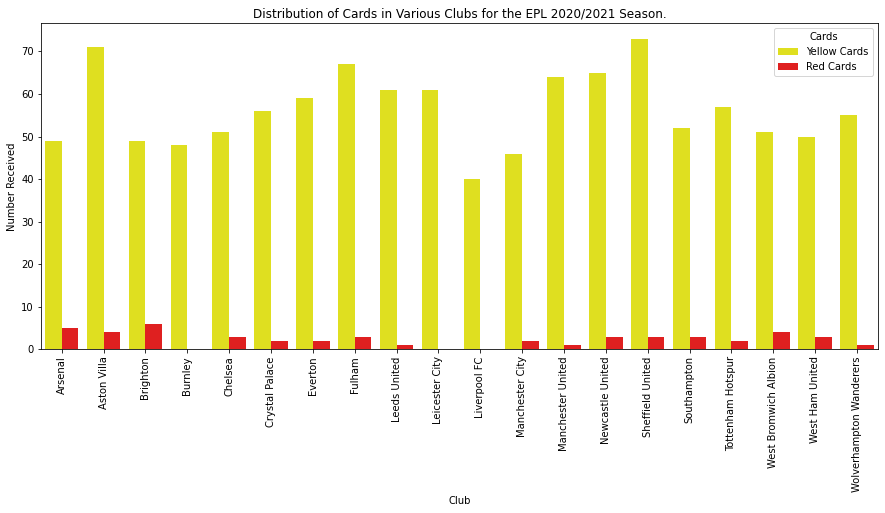

In [33]:
# Color of cards gotten by each team

palette = ["Yellow", "Red"]
cards_df = epl_df.groupby("Club")[["Yellow_Cards", "Red_Cards"]].sum().reset_index()
cards_df2 = pd.melt(cards_df, id_vars = "Club")

cards_df2.rename(columns = {"variable":"Cards", "value":"Number Received"}, inplace = True)
cards_df2["Cards"].replace("Yellow_Cards", "Yellow Cards", inplace = True)
cards_df2["Cards"].replace("Red_Cards", "Red Cards", inplace = True)

plt.figure(figsize = [15, 6])
sns.barplot(data = cards_df2, x = "Club", y = "Number Received", hue = "Cards", palette = palette);
plt.xticks(rotation = 90)
plt.title("Distribution of Cards in Various Clubs for the EPL 2020/2021 Season.");

**Insight 11**: Every single club in the premier league picked up at least 30 yellow cards over the course of the season on the other hand, none of them picked up to 10 red cards.

**Insight 12**: Sheffield United had the highest number of yellow cards.

**Insight 13**: The evidence of Sheffield United having the highest number of yellow cards, followed closely by aston Villa and Manchester United (which is the youngest team on average) in combination support the theory that younger players were more likely to commit yellow card offences and we can also see from the coeelation map above that there is a 0.17 correlation score between the age and number of yellow cards received.